# Machine Learning Week 5 Assignment
by Eva Aßmann, Paul Vogler

Dataset used: Heart Disease https://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
uploaded = files.upload()

Saving processed.cleveland.data to processed.cleveland.data


In [4]:
df = pd.read_csv("processed.cleveland.data", sep=",", 
                  names=["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
                         "thalach", "exang", "oldpeak", "slope", "ca", "thal",
                         "num"], na_values="?") 
df.head() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


# Preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null float64
sex         303 non-null float64
cp          303 non-null float64
trestbps    303 non-null float64
chol        303 non-null float64
fbs         303 non-null float64
restecg     303 non-null float64
thalach     303 non-null float64
exang       303 non-null float64
oldpeak     303 non-null float64
slope       303 non-null float64
ca          299 non-null float64
thal        301 non-null float64
num         303 non-null int64
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


**Handle the 6 nan entries: 4x nan in ca column and 2x nan in thal column**<br>delete these from the table

In [6]:
df.dropna(inplace=True)
df.isnull().values.any()

False

__Now check if value range, type and fromat correspond to data description for all categories:__
- age: in years
- sex: (1 = male; 0 = female)
- cp: chest pain type 
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic)
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 20 ekgmo (month of exercise ECG reading)
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
    - Value 1: upsloping
    - Value 2: flat
    - Value 3: downsloping
- ca: number of major vessels (0-3) colored by flourosopy
- thal: exercise thallium scintigraphic defects
  - 3 = normal
  - 6 = fixed defect
  - 7 = reversible defect
- num: diagnosis of heart disease (angiographic disease status)
    - Value 0: < 50% diameter narrowing
    - Value 1: > 50% diameter narrowing (in any major vessel: attributes 59 through 68 are vessels)

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


**Examine value sets**

In [8]:
for elem in df.columns:
    print(elem+':')
    print(set(df[elem].values))
    print('----')

age:
{29.0, 34.0, 35.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 74.0, 76.0, 77.0}
----
sex:
{0.0, 1.0}
----
cp:
{1.0, 2.0, 3.0, 4.0}
----
trestbps:
{128.0, 129.0, 130.0, 132.0, 134.0, 135.0, 136.0, 138.0, 140.0, 142.0, 144.0, 145.0, 146.0, 148.0, 150.0, 152.0, 154.0, 155.0, 156.0, 158.0, 160.0, 164.0, 165.0, 170.0, 172.0, 174.0, 178.0, 180.0, 192.0, 200.0, 94.0, 100.0, 101.0, 102.0, 104.0, 105.0, 106.0, 108.0, 110.0, 112.0, 114.0, 115.0, 117.0, 118.0, 120.0, 122.0, 123.0, 124.0, 125.0, 126.0}
----
chol:
{564.0, 126.0, 131.0, 141.0, 149.0, 157.0, 160.0, 164.0, 166.0, 167.0, 168.0, 169.0, 172.0, 174.0, 175.0, 176.0, 177.0, 178.0, 180.0, 182.0, 183.0, 184.0, 185.0, 186.0, 187.0, 188.0, 192.0, 193.0, 195.0, 196.0, 197.0, 198.0, 199.0, 200.0, 201.0, 203.0, 204.0, 205.0, 206.0, 207.0, 208.0, 209.0, 210.0, 211.0, 212.0, 213.0

__Encode num as categorical__:<br>
- presence = 1 (for values 1,2,3,4)
- absence = 0 (for value 0)

In [9]:
df['num'][df['num'] >= 1] = 1
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


__Convert float to int__<br>
See which columns can be changed to datatype int64; then change float to int for all possible cases.<br>

In [10]:
for col in df.columns.values.tolist():
    if df[col].dtype == np.float64:
        print(col + "\t: " + str(df[col].apply(float.is_integer).all()))
    else:
        print(col + "\t: " + str(df[col].dtype))

age	: True
sex	: True
cp	: True
trestbps	: True
chol	: True
fbs	: True
restecg	: True
thalach	: True
exang	: True
oldpeak	: False
slope	: True
ca	: True
thal	: True
num	: int64


In [0]:
for col in df.columns.values.tolist():
    if df[col].dtype == np.float64 and df[col].apply(float.is_integer).all():
        df[col] = df[col].astype('int64')

# Train Decision Trees 
with depth 2, 3 and 4 and reduced by PCA to two dimensions

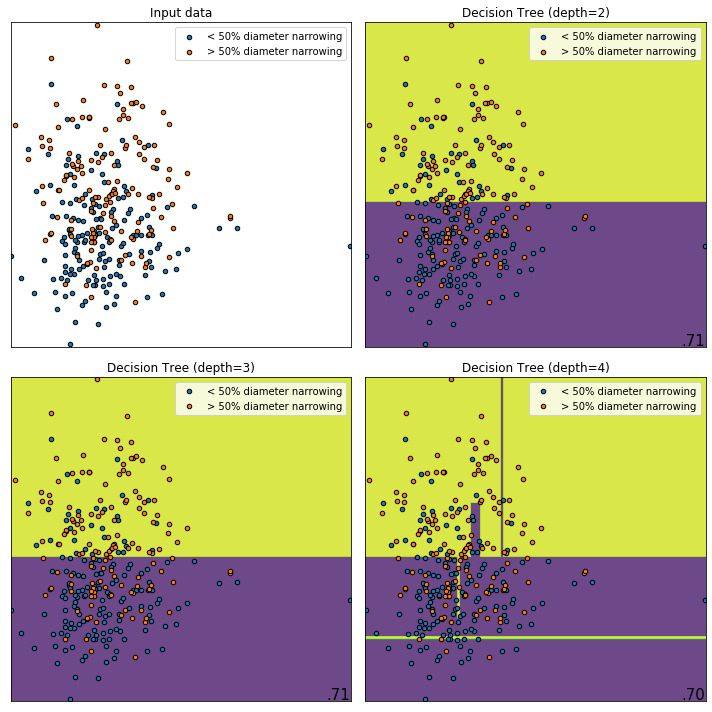

In [12]:
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn.tree import DecisionTreeClassifier
h = .02  # step size in the mesh

names = ['Decision Tree (depth=2)', 'Decision Tree (depth=3)', 'Decision Tree (depth=4)']

classifiers = [
    DecisionTreeClassifier(max_depth=2),
    DecisionTreeClassifier(max_depth=3),
    DecisionTreeClassifier(max_depth=4)
    ]

figure = plt.figure(figsize=(10, 10))
i = 1
# perform PCA to reduce the dimensions to 2
pca = decomposition.PCA(n_components=2)
pca.fit(df.drop('num', axis=1))
X = pca.transform(df.drop('num', axis=1))
y = df['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

ax = plt.subplot(2, 2, i)
ax.set_title("Input data")
# Plot the training and testing points
ix1 = np.where(y_train.to_numpy() == 0)
ix2 = np.where(y_train.to_numpy() == 1)
ix3 = np.where(y_test.to_numpy() == 0)
ix4 = np.where(y_test.to_numpy() == 1)
ax.scatter(np.concatenate((X_train[:, 0][ix1], X_test[:, 0][ix3])),
           np.concatenate((X_train[:, 1][ix1], X_test[:, 1][ix3])),
           s = 20, edgecolor='k', label='< 50% diameter narrowing')
ax.scatter(np.concatenate((X_train[:, 0][ix2], X_test[:, 0][ix4])),
           np.concatenate((X_train[:, 1][ix2], X_test[:, 1][ix4])),
           s=20, edgecolor='k', label='> 50% diameter narrowing')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
ax.legend()
i += 1
tree_list = []
# iterate over classifiers
for name, clf in zip(names, classifiers):
    ax = plt.subplot(2, 2, i)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    tree_list += [clf]
    # Plot the decision boundary. For that, we will assign a color to each
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=.8)
    # Plot the training and testing points
    ax.scatter(np.concatenate((X_train[:, 0][ix1], X_test[:, 0][ix3])),
           np.concatenate((X_train[:, 1][ix1], X_test[:, 1][ix3])),
           s = 20, edgecolor='k', label='< 50% diameter narrowing')
    ax.scatter(np.concatenate((X_train[:, 0][ix2], X_test[:, 0][ix4])),
           np.concatenate((X_train[:, 1][ix2], X_test[:, 1][ix4])),
           s=20, edgecolor='k', label='> 50% diameter narrowing')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(name)
    ax.legend()
    ax.text(xx.max() - .8, yy.min() + .8, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
    i += 1

plt.tight_layout()
plt.show()

# Plot the Decision Trees

Decision Tree with depth 2


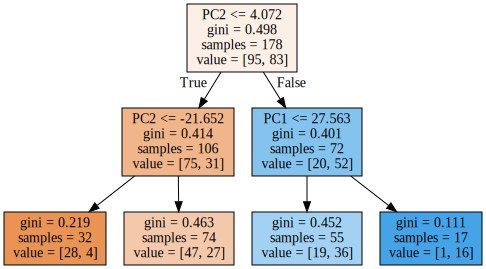

Decision Tree with depth 3


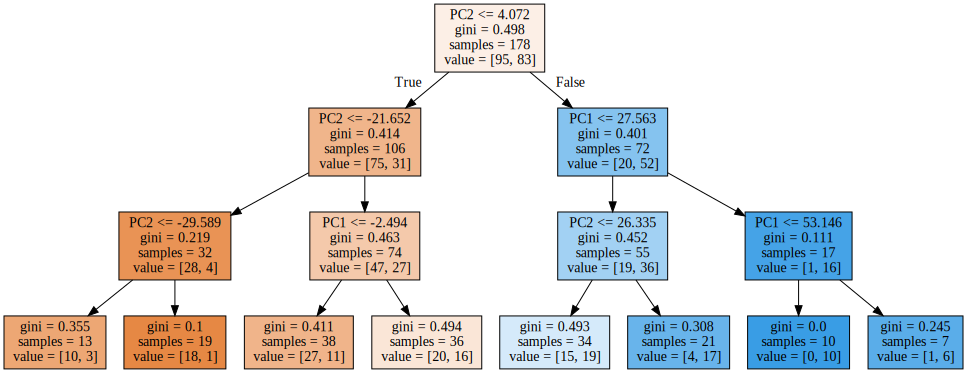

Decision Tree with depth 4


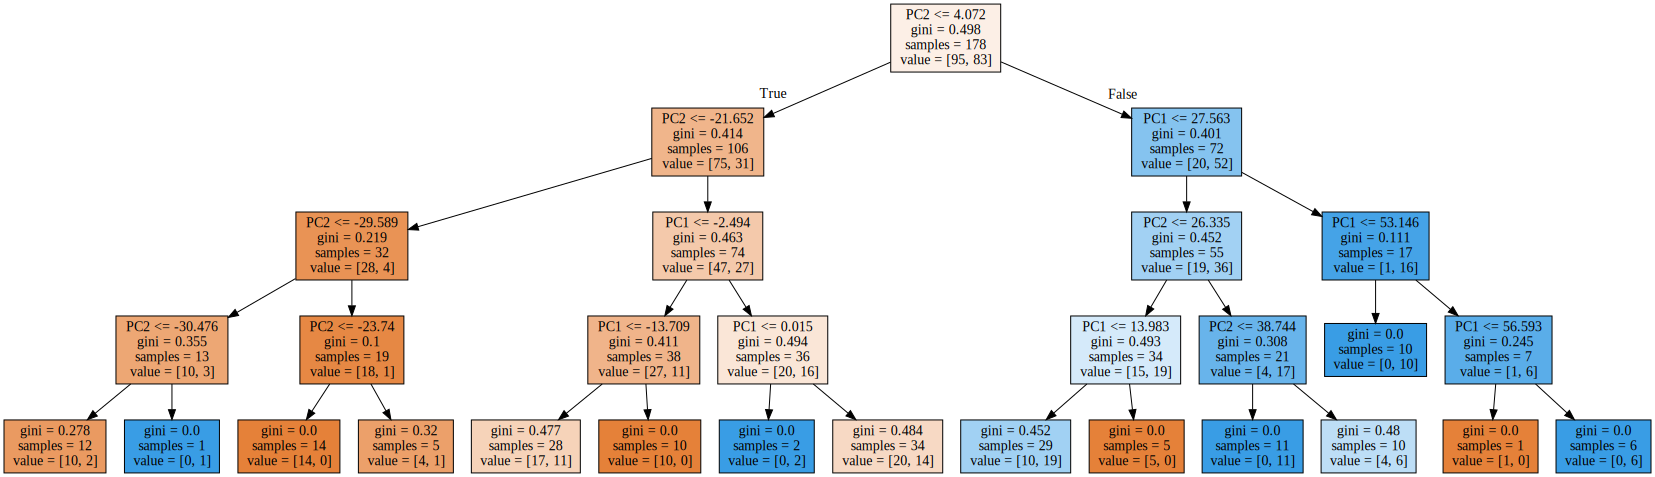

In [13]:
from graphviz import Source
from sklearn import tree
from IPython.display import SVG
i = 2
for class_tree in tree_list:
  # tree.export_graphviz(class_tree, out_file="DTree_Depth_" + str(i), feature_names=['PC1','PC2'], filled=True)
  graph = Source( tree.export_graphviz(class_tree, out_file=None, feature_names=['PC1','PC2'], filled=True))
  print('Decision Tree with depth', i)
  display(SVG(graph.pipe(format='svg')))
  i += 1

# Evaluate the Cross-Validation of the Trees
The Accuracy through cross validation for the three variations are:

*   Depth 2: 71%
*   Depth 3: 69%
*   Depth 4: 67%

So the lowest tree depth (and therefore the one with the lowest complexity) has the highest accuracy score of the three compared decision trees



# Train a simple classifier (Logistic Regression)

In [0]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()

In [15]:
reg.fit(X_train, y_train)
score_reg = reg.score(X_test, y_test)
print("Accuracy Score:")
score_reg

Accuracy Score:


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7142857142857143

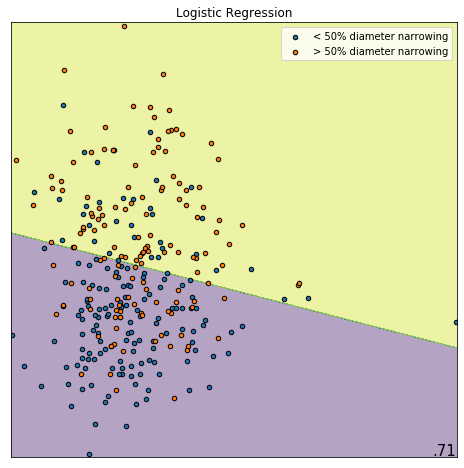

In [16]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8,8))
plt.contourf(xx, yy, Z, alpha=0.4)
# Plot the training points
ix1 = np.where(y_train.to_numpy() == 0)
ix2 = np.where(y_train.to_numpy() == 1)
ix3 = np.where(y_test.to_numpy() == 0)
ix4 = np.where(y_test.to_numpy() == 1)
plt.scatter(np.concatenate((X_train[:, 0][ix1], X_test[:, 0][ix3])),
           np.concatenate((X_train[:, 1][ix1], X_test[:, 1][ix3])),
           s = 20, edgecolor='k', label='< 50% diameter narrowing')
plt.scatter(np.concatenate((X_train[:, 0][ix2], X_test[:, 0][ix4])),
           np.concatenate((X_train[:, 1][ix2], X_test[:, 1][ix4])),
           s=20, edgecolor='k', label='> 50% diameter narrowing')
plt.title('Logistic Regression')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.legend()
plt.text(xx.max() - .8, yy.min() + .8, ('%.2f' % score_reg).lstrip('0'),
                size=15, horizontalalignment='right')
plt.show()